<a href="https://colab.research.google.com/github/spisupat/RL_tutorials/blob/main/Temporal_difference_learning_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temporal difference learning

Temporal difference learning is an algorithm that extends the ideas from Rescorla-Wagner learning to predictions *in time*. 
Similar to the associative strength V(CS) in Rescorla Wagner learning (which was the expected US predicted by a given CS), when there are multiple states encountered through time, we can define the **value $V(S_t)$** as the **expected sum of future reinforcement** predicted by the state **$S_t$**. The "expected" here refers to the fact that this is an "expectation" or average across trials $i \in 1:N$. Importantly, note that this value only includes reinforcements encountered in **future** states i.e. **$r(S_{t+1})$** onwards.

$$V(S_t) =  \mathbb{E}_i[r(S_{t+1}) + r(S_{t+2}) + r(S_{t+3})... + r(S_{T})]$$

In order to estimate this value, we could in theory wait till the end of each trial $(t=T)$, sum up all the reinforcements experienced in that trial, and then average across trials for each state $S_t$, but Temporal Difference learning gives us an efficient way to update values without having to wait for all future reinforcements! This comes from recognizing that the value of each state can be expressed not just in terms of future reinforcements, but future *values*:


$$V(S_t) =  \mathbb{E}_i[r(S_{t+1}) + r(S_{t+2}) + r(S_{t+3})... + r(S_{T})]\\
  V(S_t) =  \mathbb{E}_i[r(S_{t+1})]  + \mathbb{E}_i[r(S_{t+2}) + r(S_{t+3})... + r(S_{T})]\\ V(S_t) =  \mathbb{E}_i[r(S_{t+1})]  + V(S_{t+1})$$

This gives us a way to update each state's value after simply experiencing the *next state's reinforcement* alone, by using the *next state's value* as a proxy for reinforcements further into the future. A **prediction error $\delta$** can then be computed as the difference between what is experienced (the next state's reinforcement + next state's value) and what is predicted (the current state's value) and used to update the current state's value, scaled by a learning rate $\eta$.

$$ \delta_{t+1} = r(S_{t+1}) + V(S_{t+1}) - V(S_{t})\\
V(S_{t})^{new} \leftarrow V(S_t) + \eta \delta_{t+1}
$$

Let us simulate Temporal Difference learning below for simple conditioning

(Scroll down for solutions!).


## Question 1
Write a piece of code in the innermost loop to implement the temporal difference learning rule

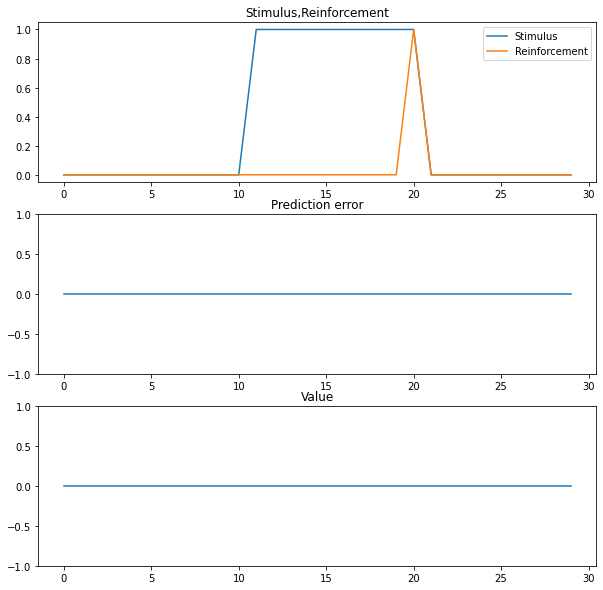

In [ ]:
# Importing some basic libraries we will use
import numpy as np # Mathematical library with support for matrix manipulation akin to MATLAB
import matplotlib.pyplot as plt #Plotting library similar to MATLAB's "plot"
from IPython.display import clear_output #Useful to animate plots

# Stimulus reinforced with US at timestep 20
nTrials = 40                            # Total number of trials
nTimesteps = 30                         # Total number of timesteps
S = np.zeros([nTrials,nTimesteps])      # Stimulus
R = np.zeros([nTrials,nTimesteps])      # Reinforcement 
S[:,11:21] = 1;                         # Stimulus presented during timesteps 11-20
R[:,20] = 1;                            # Reinforcement arrives at timestep 20

# Initialize learning variables
V = np.zeros([nTimesteps])     # Vector of values (initialized to zero) for each state/timestep
delta = np.zeros([nTimesteps]) # Vector of prediction errors for each state/timestep
eta = 0.5                      # Learning rate

# Loop through trials
for i in np.arange(nTrials):
  # Loop through timesteps
  for t in np.arange(nTimesteps-1):
    # Current state's stimulus, value prediction
    s_curr = S[i,t]
    V_curr = V[t]
    # Move to next state, experience reinforcement, value
    s_next = S[i,t+1]
    r_next = R[i,t+1]
    V_next = V[t+1]

    #**** Insert learning rule here *****


  #Plot stimulus, prediction errors, values from past trial
  plt.figure(figsize=(10,10))
  plt.subplot(311,title='Stimulus,Reinforcement')
  plt.plot(S[1,:],label = 'Stimulus')
  plt.plot(R[1,:],label = 'Reinforcement')
  plt.legend()

  plt.subplot(312,title='Prediction error')
  plt.ylim([-1,1])
  clear_output(wait=True)
  plt.plot(delta)

  plt.subplot(313,title='Value')
  plt.ylim([-1,1])
  plt.plot(V)
  plt.show()


### Question 1: Solution

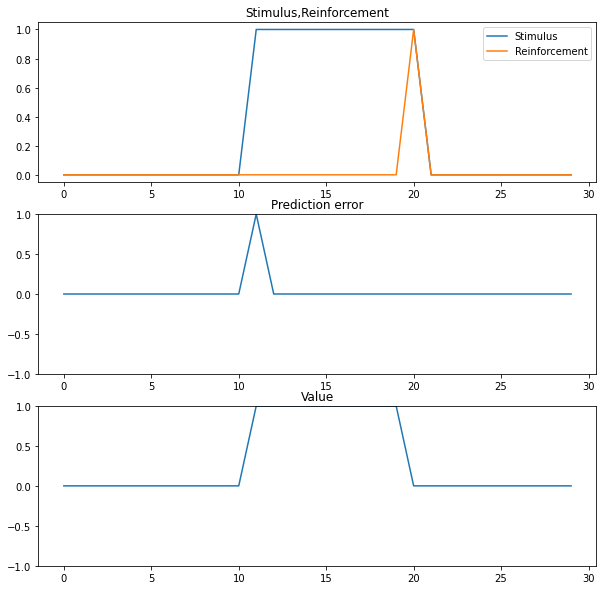

In [ ]:
# Importing some basic libraries we will use
import numpy as np # Mathematical library with support for matrix manipulation akin to MATLAB
import matplotlib.pyplot as plt #Plotting library similar to MATLAB's "plot"
from IPython.display import clear_output #Useful to animate plots

# Stimulus for basic conditioning - single CS, always reinforced with US after a few timesteps
nTrials = 40                            # Total number of trials
nTimesteps = 30                         # Total number of timesteps
S = np.zeros([nTrials,nTimesteps])      # Stimulus
R = np.zeros([nTrials,nTimesteps])      # Reinforcement 
S[:,11:21] = 1;                         # Stimulus presented on timesteps 11-20
R[:,20] = 1;                            # Reinforcement arrives are timestep 20


# Associative learning variables
V = np.zeros([nTimesteps])     # Vector of values (initialized to zero) for each state/timestep
delta = np.zeros([nTimesteps]) # Vector of prediction errors for each state/timestep
eta = 0.5                      # Learning rate

# Loop through trials
for i in np.arange(nTrials):
  # Loop through timesteps
  for t in np.arange(nTimesteps-1):
    # Current state's stimulus, value prediction
    s_curr = S[i,t]
    V_curr = V[t]
    # Move to next state, experience reinforcement, value
    s_next = S[i,t+1]
    r_next = R[i,t+1]
    V_next = V[t+1]


    delta[t+1] = r_next + V_next*s_next - V_curr*s_curr
    V[t] = V[t]*s_curr + s_curr*eta*delta[t+1]


  #Plot stimulus, prediction errors, values from past trial
  plt.figure(figsize=(10,10))
  plt.subplot(311,title='Stimulus,Reinforcement')
  plt.plot(S[1,:],label = 'Stimulus')
  plt.plot(R[1,:],label = 'Reinforcement')
  plt.legend()

  plt.subplot(312,title='Prediction error')
  plt.ylim([-1,1])
  clear_output(wait=True)
  plt.plot(delta)

  plt.subplot(313,title='Value')
  plt.ylim([-1,1])
  plt.plot(V)
  plt.show()


## Question 2
Now starting from this **trained** value, what happens to the prediction error on the very next trial, if the reinforcement is delivered sooner? How does the prediction error at the start of the stimulus compare to the previous task, after training on this new schedule for 40 trials? Simulate below

In [ ]:
# Stimulus with early reinforcement at timestep 15
nTrials = 40                            # Total number of trials
nTimesteps = 30                         # Total number of timesteps
S = np.zeros([nTrials,nTimesteps])      # Stimulus
R = np.zeros([nTrials,nTimesteps])      # Reinforcement
S[:,11:21] = 1;                         # Stimulus presented on timesteps 11-20
R[:,15] = 1;                            # Reinforcement arrives on timestep 15 instead

### Question 2: Solution


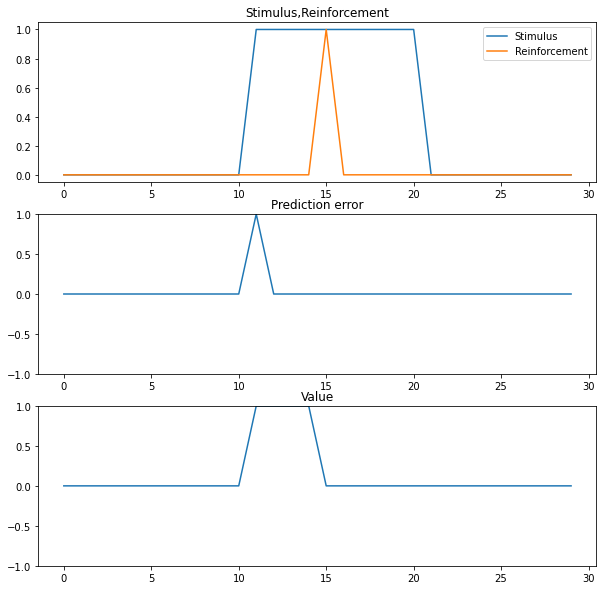

In [ ]:
# Stimulus with early reinforcement at timestep 15
nTrials = 40                            # Total number of trials
nTimesteps = 30                         # Total number of timesteps
S = np.zeros([nTrials,nTimesteps])      # Stimulus
R = np.zeros([nTrials,nTimesteps])      # Reinforcement
S[:,11:21] = 1;                         # Stimulus presented on timesteps 11-20
R[:,15] = 1;                            # Reinforcement arrives on timestep 15 instead

# Associative learning variables (retaining value from previous training)
delta = np.zeros([nTimesteps]) # Vector of prediction errors for each state/timestep
eta = 0.5                      # Learning rate

# Loop through trials
for i in np.arange(nTrials):
  # Loop through timesteps
  for t in np.arange(nTimesteps-1):
    # Current state's stimulus, value prediction
    s_curr = S[i,t]
    V_curr = V[t]
    # Move to next state, experience reinforcement, value
    s_next = S[i,t+1]
    r_next = R[i,t+1]
    V_next = V[t+1]


    delta[t+1] = r_next + V_next*s_next - V_curr*s_curr
    V[t] = V[t]*s_curr + s_curr*eta*delta[t+1]


  #Plot stimulus, prediction errors, values from past trial
  plt.figure(figsize=(10,10))
  plt.subplot(311,title='Stimulus,Reinforcement')
  plt.plot(S[1,:],label = 'Stimulus')
  plt.plot(R[1,:],label = 'Reinforcement')
  plt.legend()

  plt.subplot(312,title='Prediction error')
  plt.ylim([-1,1])
  clear_output(wait=True)
  plt.plot(delta)

  plt.subplot(313,title='Value')
  plt.ylim([-1,1])
  plt.plot(V)
  plt.show()


**There is initially a positive prediction error at the early reward (and a negative one at reward omission), but eventually the value adapts to this new schedule, and the prediction error at the start reaches the exact same level as before**

## Temporal discounting
Instead of treating all future reinforcements as equally valuable, animals often treat short term reinforcements as more valuable than long term ones. In other words, they **discount** long term reinforcement, so that a US of the same magnitude (e.g. 1 drop of juice) is worth much more now than later.

We can include this discounting of long term reinforcements into our definition of value, by multiplying the reinforcements by a **discount factor** 0≤$\gamma$≤1 for every timestep of delay, thus scaling it down successively over time.

Thus, instead of defining value as:
$$V(S_t) =  \mathbb{E}_i[r(S_{t+1}) + r(S_{t+2}) + r(S_{t+3})... ]$$
We define it as:
$$V(S_t) =  \mathbb{E}_i[r(S_{t+1}) + \gamma r(S_{t+2}) + \gamma^2 r(S_{t+3})... ]$$




## Question 3. 
Following the steps from the introduction, use this new definition of value to derive a prediction error & learning rule that includes discounting, for $\gamma$ = 0.9 and $\gamma$ = 0.6.
Simulate it for the two experiments above (reward delivered at 20 vs. 15 timesteps). Do you notice anything different about the value function & prediction error at the start of the stimulus, for the two different reward schedules?


### Question 3: Solution

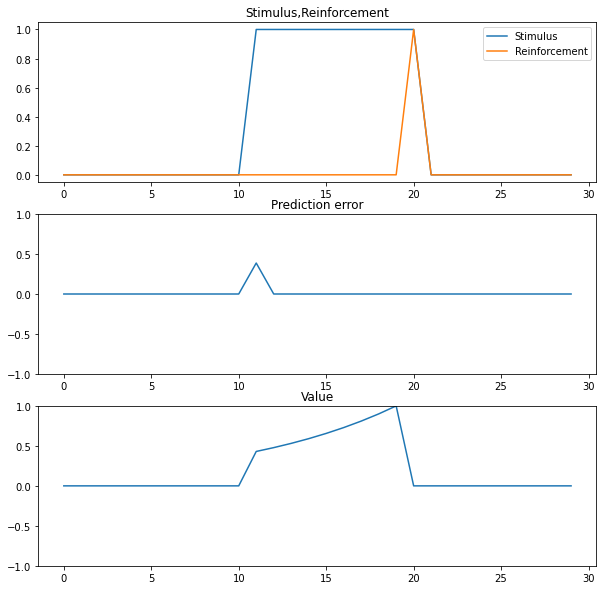

In [ ]:

# Stimulus for basic conditioning - single CS, always reinforced with US after a few timesteps
nTrials = 40                            # Total number of trials
nTimesteps = 30                         # Total number of timesteps
S = np.zeros([nTrials,nTimesteps])      # Stimulus
R = np.zeros([nTrials,nTimesteps])      # Reinforcement 
S[:,11:21] = 1;                         # Stimulus presented on timesteps 11-20
R[:,20] = 1;                            # Reinforcement arrives are timestep 20


# Associative learning variables
V = np.zeros([nTimesteps])     # Vector of values (initialized to zero) for each state/timestep
delta = np.zeros([nTimesteps]) # Vector of prediction errors for each state/timestep
eta = 0.5                      # Learning rate
gamma =0.9 

# Loop through trials
for i in np.arange(nTrials):
  # Loop through timesteps
  for t in np.arange(nTimesteps-1):
    # Current state's stimulus, value prediction
    s_curr = S[i,t]
    V_curr = V[t]
    # Move to next state, experience reinforcement, value
    s_next = S[i,t+1]
    r_next = R[i,t+1]
    V_next = V[t+1]


    delta[t+1] = r_next + gamma*V_next - V_curr
    V[t] = V[t] + eta*s_curr*delta[t+1]


  #Plot stimulus, prediction errors, values from past trial
  plt.figure(figsize=(10,10))
  plt.subplot(311,title='Stimulus,Reinforcement')
  plt.plot(S[1,:],label = 'Stimulus')
  plt.plot(R[1,:],label = 'Reinforcement')
  plt.legend()

  plt.subplot(312,title='Prediction error')
  plt.ylim([-1,1])
  clear_output(wait=True)
  plt.plot(delta)

  plt.subplot(313,title='Value')
  plt.ylim([-1,1])
  plt.plot(V)
  plt.show()


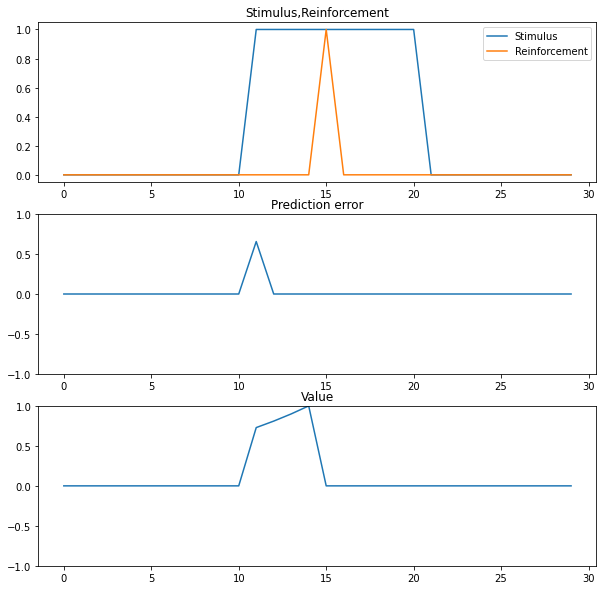

In [ ]:

# Stimulus for basic conditioning - single CS, always reinforced with US after a few timesteps
nTrials = 40                            # Total number of trials
nTimesteps = 30                         # Total number of timesteps
S = np.zeros([nTrials,nTimesteps])      # Stimulus
R = np.zeros([nTrials,nTimesteps])      # Reinforcement 
S[:,11:21] = 1;                         # Stimulus presented on timesteps 11-20
R[:,15] = 1;                            # Reinforcement arrives are timestep 20


# Loop through trials
for i in np.arange(nTrials):
  # Loop through timesteps
  for t in np.arange(nTimesteps-1):
    # Current state's stimulus, value prediction
    s_curr = S[i,t]
    V_curr = V[t]
    # Move to next state, experience reinforcement, value
    s_next = S[i,t+1]
    r_next = R[i,t+1]
    V_next = V[t+1]


    delta[t+1] = r_next + gamma*V_next - V_curr
    V[t] = V[t] + eta*s_curr*delta[t+1]


  #Plot stimulus, prediction errors, values from past trial
  plt.figure(figsize=(10,10))
  plt.subplot(311,title='Stimulus,Reinforcement')
  plt.plot(S[1,:],label = 'Stimulus')
  plt.plot(R[1,:],label = 'Reinforcement')
  plt.legend()

  plt.subplot(312,title='Prediction error')
  plt.ylim([-1,1])
  clear_output(wait=True)
  plt.plot(delta)

  plt.subplot(313,title='Value')
  plt.ylim([-1,1])
  plt.plot(V)
  plt.show()


**Now, because of temporal discounting, the value of the cue predicting immediate reward is more than the cue predicting distant reward, giving rise to a much bigger prediction error at stimulus start**